Consider the data present in the Insurance dataset file.
Following is the attribute related information:


* age: age of primary beneficiary

* sex: insurance contractor gender, female, male.

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg/m^2) using the ratio of height to weight, ideally 18.5 to 24.9.

* children: Number of children covered by health insurance / Number of dependents.

* smoker: Smoking, yes or no

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance


Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\RBI\Downloads\datasets_insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Exploratory Data Analysis

In [3]:
print(data.shape)

(1338, 7)


In [4]:
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [5]:
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the data

### Checking Assumptions for Linear Regression

In [10]:
# Assupmtion 1: No outliers in data

data.boxplot()

<Axes: >

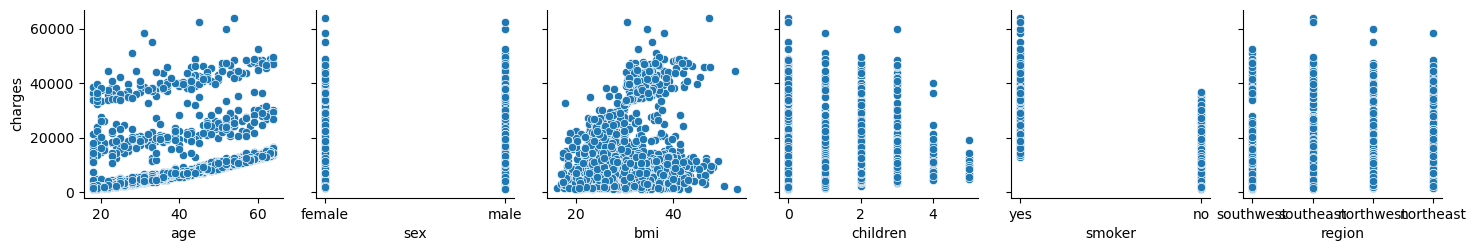

In [14]:
# Assupmtion 2: Assumption of Linearity

sns.pairplot(data,x_vars=['age','sex', 'bmi', 'children', 'smoker', 'region'],
            y_vars=['charges'],kind='scatter')                     
plt.show()

From the pair plot it can be seen that age and charges have a linear relationship, while BMI also shows a linar relationship with charges. Sex, childern, smoker and region have no relationship as they have categorical data.

In [15]:
# Creating X and Y

X=data.loc[:,['age','sex', 'bmi', 'children', 'smoker', 'region']]
Y=data.loc[:,['charges']]

print(X.shape)
print(Y.shape)

(1338, 6)
(1338, 1)


X is the Indenpendent variable and Y is the dependent varibales.

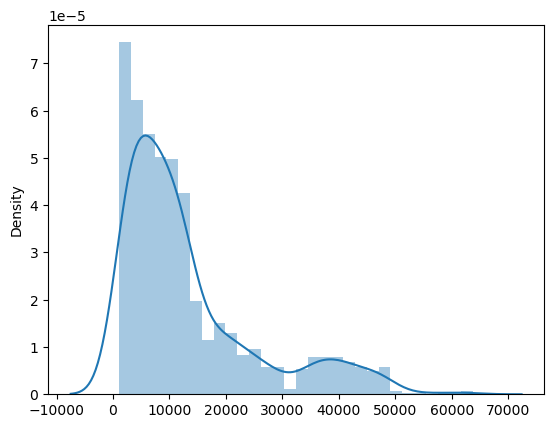

In [16]:
# Assupmtion 3: Normality distributed data

sns.distplot(Y)
plt.show()

The data Charges is Right Skewed. Therefore we have to do the log transformation to remove th skewness from the data and bring it to normal distribution.

In [17]:
# Log transformation
Y_log=np.log(Y)

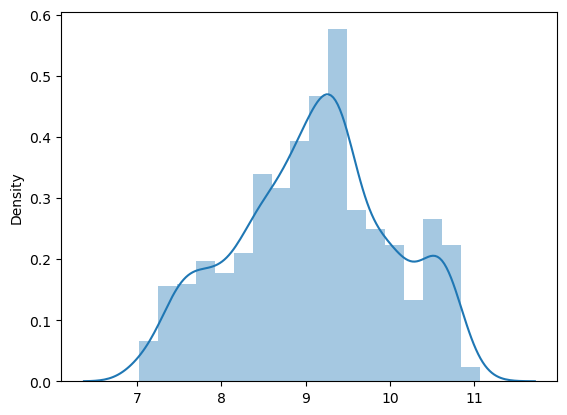

In [18]:
sns.distplot(Y_log)
plt.show()

Now the data Charges has been normally distrubuted.

In [19]:
# Convert catergorical variables to numerical variables

X['sex'].replace(['female', 'male'],[0, 1], inplace=True)
X['smoker'].replace(['no','yes'],[0,1],inplace=True)
X['region'].replace(['northeast','northwest','southeast','southwest'],[0,1,2,3],inplace=True)

In [20]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


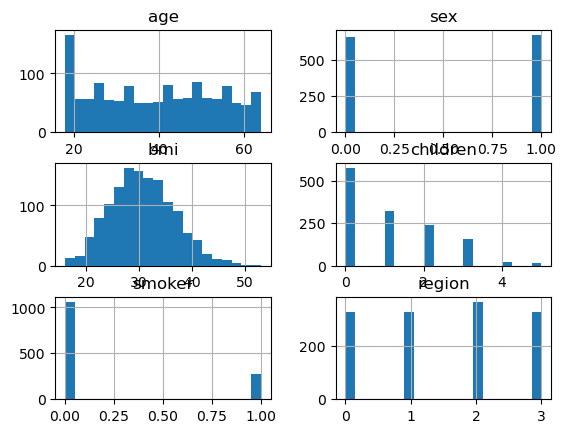

In [21]:
# Checking normality in X variables

X.hist(bins=20)
plt.show()

From the above graph it can seen that BMI and Smkoer show a normal distribuion.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


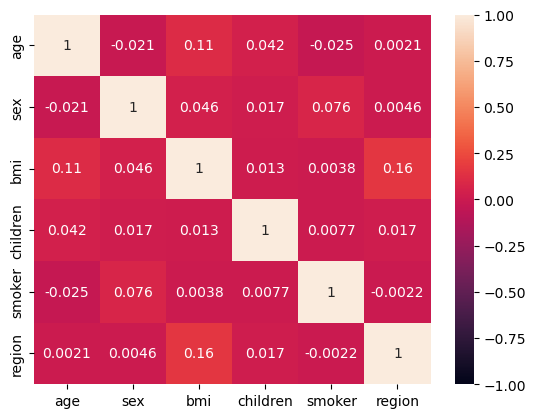

In [25]:
# Assumption 4 : No multicollinearity in the data

corr_df=X.corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

From the heat map it can be seen that the X vaiables do not show colinearity amoung each other.

In [20]:
# Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.37
3,children,1.80
4,smoker,1.26
5,region,2.92


It can be seen that Age and BMI have high multicolinearity, while rest variables have less multicoliniarity. We will not eliminate Age and BMI as these varibales are important with repect to our problem.

In [28]:
# Spliting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2,random_state=10)   

In [29]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1070, 6)
(1070, 1)
(268, 6)
(268, 1)


The data has been splitted into train and test. The test size given is 0.2 which means that 80% of the data is for training while 20% is reserved for testing.

###  Building Linear Regression model
#### Base Linear Regression model

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, Y_train)            

# print intercept and coefficients
print("Intercept",lm.intercept_)                     
print("Coefficients",lm.coef_)                          

Intercept [6.99879762]
Coefficients [[ 0.03498834 -0.0711322   0.01259126  0.09962977  1.5693443  -0.03889152]]


In [34]:
# Predict using the model
Y_pred=lm.predict(X_test)
print(Y_pred) 

[[ 8.90264566]
 [ 8.55800249]
 [ 9.44206862]
 [ 9.37109228]
 [ 8.30231857]
 [ 8.93127398]
 [ 9.22860018]
 [ 9.62770497]
 [ 8.96169962]
 [10.524292  ]
 [ 8.12183109]
 [ 8.270934  ]
 [ 8.75991467]
 [ 9.14967223]
 [ 9.23002002]
 [ 9.36183759]
 [ 8.32332991]
 [ 9.81527793]
 [ 9.18395253]
 [10.20908992]
 [10.5308626 ]
 [ 8.06726747]
 [ 7.95992684]
 [ 8.77128514]
 [ 8.43374205]
 [ 9.41895434]
 [ 9.01687327]
 [ 9.41850025]
 [ 8.42170066]
 [10.20084299]
 [ 7.72507636]
 [10.38861159]
 [ 8.89576619]
 [ 8.94511958]
 [ 8.45447782]
 [ 8.89057139]
 [ 9.43604078]
 [ 9.09248396]
 [ 9.09271164]
 [ 8.89473802]
 [ 9.58926813]
 [ 9.15682789]
 [ 8.54484462]
 [ 8.99761391]
 [ 7.99767708]
 [ 8.81979395]
 [ 8.91337357]
 [10.61798009]
 [ 9.30298176]
 [ 9.24221911]
 [10.01078002]
 [ 8.31758485]
 [ 8.90942155]
 [ 9.62809789]
 [ 9.09900057]
 [ 9.38167738]
 [ 9.30538021]
 [ 8.63050675]
 [ 8.707771  ]
 [10.70371838]
 [ 7.87802912]
 [10.61635976]
 [11.07322819]
 [ 7.95757539]
 [ 9.99650111]
 [ 8.87336923]
 [ 8.47709

These are the Y predicted values for X test data

In [37]:
# Evaluating the model: comparing acutal sales vs predicted sales

new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop('index',axis=1)

In [36]:
new_df

,age,sex,bmi,children,smoker,region,Actual sales,Predicted sales
0,37,0,27.740,3,0,1,8.893093,8.902646
1,36,0,26.885,0,0,1,8.569372,8.558002
2,59,1,37.100,1,0,3,9.421182,9.442069
3,61,0,25.080,0,0,2,10.106963,9.371092
4,29,0,26.030,0,0,1,8.225895,8.302319
...,...,...,...,...,...,...,...,...
263,50,1,34.200,2,1,3,10.665620,10.759633
264,26,0,40.185,0,0,1,8.071295,8.375583
265,19,1,27.265,2,0,1,10.020989,8.096113
266,57,1,40.945,0,0,0,9.355851,9.437550


In the above table Actual sales and the Predicted sales are compared. It can be seen that the predction done is very close to the acutal sales.

In [33]:
# Generating the R-squared, RMSE & Adjusant R-square values

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7049534517624695
RMSE: 0.4882327185684708
Adj R-square: 0.7036234147305949


As the R-squared value 0.7049 and the Adj R-squared value  0.7036 are very close and the RMS value 0.4882 is close to 1, it can be said that its a good model.


### Tunning the Model

#### 1. Applying RIDGE

In [40]:
from sklearn.linear_model import Ridge

# create a model object
rid = Ridge()

# train the model object
rid.fit(X_train, Y_train)            # fit test is used to train

# print intercept and coefficients
print("Intercept",rid.intercept_)                    
print("Coefficients",rid.coef_)        

Intercept [7.00041521]
Coefficients [[ 0.03498462 -0.07025584  0.01259184  0.09952118  1.5602262  -0.03886915]]


In [37]:
Y_pred=rid.predict(X_test)

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7052731948166413
RMSE: 0.487968097039376
Adj R-square: 0.7039445991509011


 R-squared value is 0.7052 and Adj R-square value is  0.7039 are very close by. The RMSE value is 0.4879 is close to 1. Therefore it is a good model.

#### 2. Applying Lasso

In [43]:
from sklearn.linear_model import Lasso

# create a model object
las = Lasso()

# train the model object
las.fit(X_train, Y_train)            # fit test is used to train

# print intercept and coefficients
print("Intercept",las.intercept_)                     # beta 0
print("Coefficients",las.coef_)           

Intercept [7.89587545]
Coefficients [ 0.03043079  0.          0.          0.          0.         -0.        ]


In [44]:
Y_pred=las.predict(X_test)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


The R-squared (0.213 )and Adj R-square(0.210) values are very low and the RMSE value (0.7969)is very high. Therefore this is a bad model.

# Conclusion:


It can be concluded that the Ridge model gives the best result when compared with the base model. The Lasso model is showing a bad model.

Therefore for this problem Ridge model should be used.